# Description

It generates different general plots to compare coefficient values from Pearson, Spearman, CCC and Maximal Information Coefficient (MIC), such as their distribution. This notebook focuses on MIC.

In `Settings` below, the data set and other options (such as tissue for GTEx) are specified.

# Modules

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns

from ccc.plots import plot_histogram, plot_cumulative_histogram, jointplot
from ccc import conf

# Settings

In [2]:
DATASET_CONFIG = conf.GTEX
GTEX_TISSUE = "whole_blood"
GENE_SEL_STRATEGY = "var_pc_log2"

In [3]:
# this is used for the cumulative histogram
GENE_PAIRS_PERCENT = 0.70

In [4]:
CLUSTERMATCH_LABEL = "CCC"
PEARSON_LABEL = "Pearson"
SPEARMAN_LABEL = "Spearman"
MIC_LABEL = "MIC"

# Paths

In [5]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [6]:
COEF_COMP_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp"
COEF_COMP_DIR.mkdir(parents=True, exist_ok=True)
display(COEF_COMP_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp')

In [7]:
OUTPUT_FIGURE_DIR = COEF_COMP_DIR / f"gtex_{GTEX_TISSUE}" / "mic"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/mic')

In [8]:
COMPARISONS_DIR = DATASET_CONFIG["RESULTS_DIR"] / "comparison_others"
display(COMPARISONS_DIR)

PosixPath('/opt/data/results/gtex_v8/comparison_others')

In [9]:
INPUT_FILE = COMPARISONS_DIR / f"gtex_v8_data_{GTEX_TISSUE}-{GENE_SEL_STRATEGY}-all.pkl"
display(INPUT_FILE)

assert INPUT_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/comparison_others/gtex_v8_data_whole_blood-var_pc_log2-all.pkl')

# Data

In [10]:
corrs_df = pd.read_pickle(INPUT_FILE).rename(
    columns={
        "ccc": CLUSTERMATCH_LABEL,
        "pearson": PEARSON_LABEL,
        "spearman": SPEARMAN_LABEL,
        "mic": MIC_LABEL,
    }
)

In [11]:
corrs_df.shape

(12497500, 4)

In [12]:
corrs_df.head()

CCC   Pearson  Spearman       MIC
ENSG00000000419.12 ENSG00000002834.17  0.418721  0.681847  0.786595  0.569503
                   ENSG00000002919.14  0.405090  0.734699  0.816991  0.613696
                   ENSG00000002933.7   0.007466  0.013825  0.004128  0.146093
                   ENSG00000003402.19  0.391683  0.727347  0.803653  0.565137
                   ENSG00000004478.7   0.099013  0.094147  0.231269  0.253103

## Data stats

In [13]:
corrs_df.describe().applymap(str)

,CCC,Pearson,Spearman,MIC
count,12497500.0,12497500.0,12497500.0,12497500.0
mean,0.14078162169144154,0.3055270339582277,0.39444206469877185,0.3002838899566396
std,0.14482154321798,0.24329624620596305,0.2595310853531984,0.14867474248467386
min,0.0,1.5077467052648785e-08,1.3941559573460438e-08,0.10742537802451597
25%,0.02840489656767938,0.09442322140732318,0.16297401304506182,0.1849714997405876
50%,0.0811105958507932,0.23886133272185917,0.3675595119633454,0.24598146535550708
75%,0.2167198284523933,0.4953853540480224,0.6148954029591087,0.38174801093096644
max,0.9169180125916612,0.9948779504715451,0.9867424080828916,0.999998734533167


In [14]:
# skewness
corrs_df.apply(lambda x: stats.skew(x))

CCC         1.283771
Pearson     0.622893
Spearman    0.245173
MIC         1.165164
dtype: float64

# MIC subset: all gene pairs

In [15]:
# this is supposed to be one of the values of column "mic_subset"
mic_subset = "all"

## Select MIC subset

In [16]:
df = corrs_df

In [17]:
df.shape

(12497500, 4)

In [18]:
df.head()

CCC   Pearson  Spearman       MIC
ENSG00000000419.12 ENSG00000002834.17  0.418721  0.681847  0.786595  0.569503
                   ENSG00000002919.14  0.405090  0.734699  0.816991  0.613696
                   ENSG00000002933.7   0.007466  0.013825  0.004128  0.146093
                   ENSG00000003402.19  0.391683  0.727347  0.803653  0.565137
                   ENSG00000004478.7   0.099013  0.094147  0.231269  0.253103

## Histogram plot

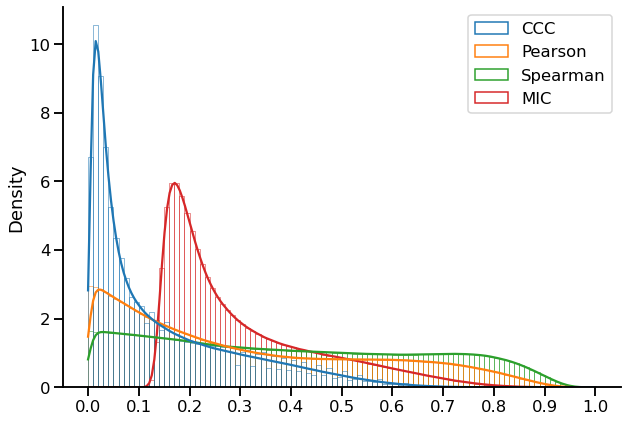

In [19]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_histogram(df, output_dir=OUTPUT_FIGURE_DIR, fill=False)

The distribution of CCC and MIC are very similar

## Cumulative histogram plot

I include also a cumulative histogram without specifying `bins`.

CCC         0.181940
MIC         0.344984
Pearson     0.434711
Spearman    0.562740
Name: 0.7, dtype: float64

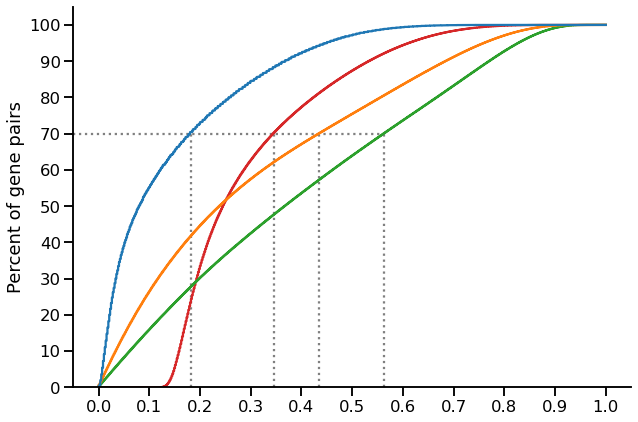

In [20]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_cumulative_histogram(df, GENE_PAIRS_PERCENT, output_dir=OUTPUT_FIGURE_DIR)

## Joint plots comparing each coefficient

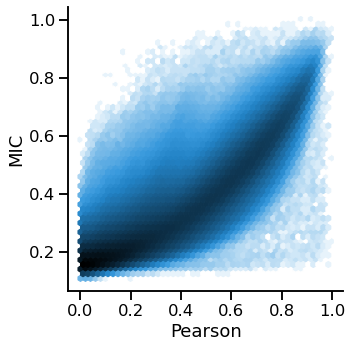

In [21]:
with sns.plotting_context("talk", font_scale=1.0):
    jointplot(
        data=df,
        x=PEARSON_LABEL,
        y=MIC_LABEL,
        add_corr_coefs=False,
        output_dir=OUTPUT_FIGURE_DIR,
    )

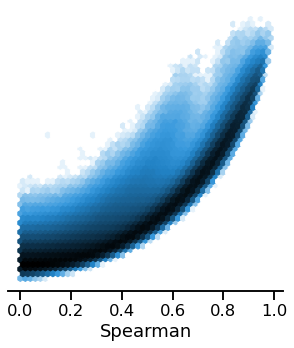

In [22]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = SPEARMAN_LABEL, MIC_LABEL

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    g.savefig(
        OUTPUT_FIGURE_DIR / f"dist-{x.lower()}_vs_{y.lower()}.svg",
        bbox_inches="tight",
        dpi=300,
        facecolor="white",
    )

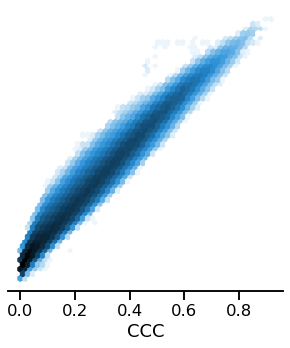

In [23]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = CLUSTERMATCH_LABEL, MIC_LABEL

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    g.savefig(
        OUTPUT_FIGURE_DIR / f"dist-{x.lower()}_vs_{y.lower()}.svg",
        bbox_inches="tight",
        dpi=300,
        facecolor="white",
    )

## Compute correlations

These are the correlation between the correlation values (!). The idea is to see how coefficient match.

In [24]:
df.corr()

,CCC,Pearson,Spearman,MIC
CCC,1.000000,0.880495,0.904513,0.987353
Pearson,0.880495,1.000000,0.933254,0.904980
Spearman,0.904513,0.933254,1.000000,0.915769
MIC,0.987353,0.904980,0.915769,1.000000


In [25]:
df.corr("spearman")

,CCC,Pearson,Spearman,MIC
CCC,1.000000,0.870081,0.943202,0.978232
Pearson,0.870081,1.000000,0.918524,0.878986
Spearman,0.943202,0.918524,1.000000,0.928572
MIC,0.978232,0.878986,0.928572,1.000000


# Create final figure

In [26]:
from svgutils.compose import Figure, SVG, Panel, Text

In [30]:
Figure(
    "64.371cm",
    "42.766cm",
    # white background
    Panel(
        SVG(COEF_COMP_DIR / "white_background.svg"),
    )
    .scale(0.5)
    .move(0, 0),
    Panel(
        SVG(OUTPUT_FIGURE_DIR / "dist-histograms.svg").scale(0.05),
        Text("a)", 0.2, 1, size=0.9, weight="bold"),
    ),
    Panel(
        SVG(OUTPUT_FIGURE_DIR / "dist-cum_histograms.svg").scale(0.05),
        Text("b)", 0.2, 1, size=0.9, weight="bold"),
    ).move(32, 0),
    Panel(
        SVG(OUTPUT_FIGURE_DIR / "dist-pearson_vs_mic.svg").scale(0.0595),
        Panel(
            SVG(OUTPUT_FIGURE_DIR / "dist-spearman_vs_mic.svg")
            .scale(0.0595)
            .move(21.5, 0)
        ),
        Panel(SVG(OUTPUT_FIGURE_DIR / "dist-ccc_vs_mic.svg").scale(0.0595).move(46, 0)),
        Text("c)", 0.2, 1, size=0.9, weight="bold"),
    ).move(0, 22),
).save(OUTPUT_FIGURE_DIR / "dist-main.svg")

Compile the manuscript with manubot and make sure the image has a white background and displays properly.